## Elektrifiseringen av sokkelen - Prosjektoppgave

#### Gustav Gabrielsen

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import requests
from pyjstat import pyjstat
import seaborn as sns

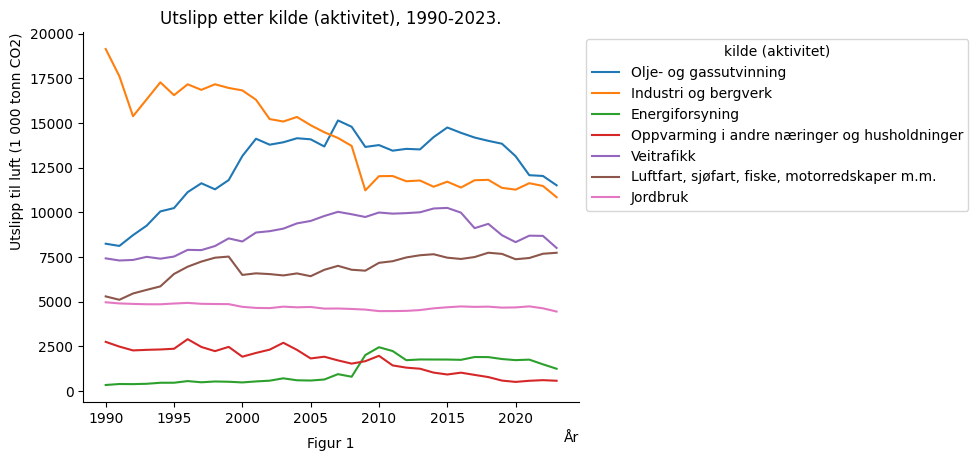

In [49]:
postUrl = 'https://data.ssb.no/api/v0/no/table/13931/'

apiQuery = {
  "query": [
    {
      "code": "UtslpTilLuft",
      "selection": {
        "filter": "vs:UtslpKildeA01",
        "values": [
          "1",
          "2",
          "3",
          "4",
          "5",
          "6",
          "7"
        ]
      }
    },
    {
      "code": "UtslpEnergivare",
      "selection": {
        "filter": "item",
        "values": [
          "VT0"
        ]
      }
    },
    {
      "code": "ContentsCode",
      "selection": {
        "filter": "item",
        "values": [
          "UtslippCO2ekvival"
        ]
      }
    }
  ],
  "response": {
    "format": "json-stat2"
  }
}

def apiToDataframe(postUrl, query):

    # postUrl som spørringen skal postes mot
    # Spørringen og endepunktet til API-et kan hentes fra Statistikkbanken.

    res = requests.post(postUrl, json=query)
    # legger resultat i ds. DS har i tillegg en del metadata
    ds = pyjstat.Dataset.read(res.text)
    # skriver resultatet til to dataframes
    # først dataframe med tekst
    df = ds.write('dataframe')
    # deretter dataframe med koder
    df_id = ds.write('dataframe', naming='id')
    # returnerer også ds i tilfelle en trenger metadata
    return df, df_id, ds

utslipp_df, df_id, ds = apiToDataframe(postUrl, apiQuery)

utslipp_df['år'] = pd.to_numeric(utslipp_df['år'])

fig ,ax = plt.subplots()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

ax.set_ylabel('Utslipp til luft (1 000 tonn CO2)', loc='top')
ax.set_xlabel('År', loc='right')

ax.set_title('Utslipp etter kilde (aktivitet), 1990-2023.')
ax.text(0.5, -0.125, 'Figur 1', transform=ax.transAxes, ha='center')


sns.lineplot(data=utslipp_df, x="år", y="value", hue="kilde (aktivitet)")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Figur 1 viser utslipp til luft etter kilde (1 000 tonn CO2-ekvivalenter), i en tidsserie fra 1990 til 2023. Figuren viser at utslippene fra olje- og gassutvinning er størst, med ca 11 514 tonn CO2 i 2023. Observere også en negativ trend siden 2015. Denne reduksjonen i utslipp fra den norske sokkelen siden 2015 er betydelig knyttet til elektrifisering av offshore plattformer. Flere prosjekter har blitt implementert for å overføre olje- og gassplattformer fra å bruke gass-turbiner, som har høye CO2-utslipp, til å bli drevet av elektrisitet levert via kabler fra land. Denne overgangen er en del av en bredere innsats for å redusere karbonavtrykket og oppnå Norges ambisiøse klimamål. 

Elektrifisering er spesielt bemerkelsesverdig ettersom den ikke bare reduserer utslipp av drivhusgasser, men også i mange tilfeller senker driftskostnadene og forbedrer den økonomiske levetiden til oljefeltene. For eksempel har betydelige prosjekter som de på Draugen og Njord A-plattformene som mål å redusere CO2-utslippene med store marginer årlig når de er fullt operasjonelle​(S&P Global)​(Offshore Energy).

## Elektrifisering av plattformene Troll B og C - Tiltakskostand

De viktigste antakelsene og avgrensningene kan kort oppsumeres med følgende punkter:

- $CO_2$ utslipp og investeringskostander på Troll B og C. Her er det blitt anvendt tall oppgitt av Equinor (2024). 

I Thema rapporten knytter de tiltakskostnadene til NPV ved å sammenligne de økonomiske kostnadene for elektrifisering med besparelsene i form av reduserte CO₂-utslipp. Tiltakskostnaden beregnes som merkostnaden ved elektrifisering delt på mengden $CO_2$ som unngås, og dette vurderes i lys av prosjektets levetid.

Det er flere måter man kan koble tiltakskostnaden til NPV: Diskontering av fremtidige utslippsbesparelser: Fremtidige utslippsreduksjoner diskonteres til dagens verdi ved hjelp av en diskonteringsfaktor. Dette gir en NPV-beregning for tiltaket som viser om de fremtidige besparelsene på CO₂-kostnader er høyere enn investeringskostnadene ved elektrifisering. 

Vurdering av markedsverdi av frigjort gass: Investeringskostnadene sammenlignes også med verdien av den frigjorte gassen som kan eksporteres eller brukes til andre formål. Hvis den økonomiske verdien av gassen er høy, kan dette redusere tiltakskostnaden betydelig og bidra til en positiv NPV​.

Kombinasjon av tiltakskostnad og NPV: Hvis tiltakskostnaden for elektrifisering er lavere enn summen av kvotepris og CO₂-avgift (uttrykt som nåverdi), blir tiltaket ansett som lønnsomt, både bedriftsøkonomisk og samfunnsøkonomisk.

#### Kostnader for elektrifisering av Troll B og C

Equinor har beregnet at investeringene knyttet til elektrifiseringen av Troll B og C vil beløpe seg til om lag 8.1 milliarder nok. Prosjektet har fått tilegnet støtte ifra Næringslivets NOx-fond på totalt 520 millioner norske kroner. 

#### Reduksjoner i utslipp 

I 2021 ble de årlige utslippsreduksjoner anslått til å utgjøre ca. $450 \; 000$ tonn $CO_2$ per år. Dette er over tre prosent av de totale utslippene fra olje og gass utvinning (Equinor, 2021). Prosjektet omfatteter en delvis elektrifisering av Troll B og en full elektrifisering av Troll C. Den 7. septemeber 2024 skrev Equinor en melding om at plattform B og C nå er delvis elektrifisert med strøm fra land. Dette reduserer utslipp på norsk sokkel med $25\;000$ tonn $CO_2$, noe som reduserer de årlige totale norske utslippene med en halv prosent.
TWEL prosjektet har som mål å fortsette elektrifiseringen, slik at Troll C er fullt elektrifisert. Når prosjektet er ferdigstilt skal de årlige utslippene reduseres med ytterligere $200 \; 000 \; tonn$ $CO_2$. Den årlige reduksjonen av $CO_2$-utslipp er dermed beregnet til å utgjøre om lag $450 \; 000 \; tonn$ $CO_2$, som er det samme tallet som ble beregnet i 2021. Totalt sett skal dette redusere de totale årlige utslippene i Norge med rundt 1 prosent, og utslippene fra utvinning av gass og olje med nesten 4 prosent. Infrastrukturen på Kollsnes og kabelen til plattformen er designet for en mulig full elektrifisering av Troll B ved et senere tidspunkt (Equinor, 2024)

#### Driftskostander - strøm

For å finne de årlige drifts kostnadene for plattformen vil jeg først estimere disse basert på strømpriser, vedlikeholdskostnader for elektrisk utstyr og mulige gass besparelser ved eksport av frigjort gass. 

Det totale strømforbruket er estimert til 116MW etter full elektrifisering av Troll C (Equinor, 2024). Strømprisen fra det norske kraftverket kan variere men vi kan anta en gjennomsnittlig pris på 0,5 - 1,0 NOK Per kWh. Dette er en grov estimasjon basert på historiske kraftpriser i Norge. Plattformene vil sannsynligvis være i drift hele året. Med 8760 timer i året: 365 dager $\times$ 24 timer, kan vi nå beregne det årlige strømforbruket. 

$$ Årlige \; strømkostnader = strømforbruk (MW) \times Årlige \; timer \times Strømpris \; per \; kWh $$ 

Hvi vi antar en strømpris på $0,75$ NOK per kWh, kan vi sette opp en beregning:

$$ Årlige \; strømkostnader = 116 MW \times 8760 \; timer \times 0,75 NOK/kWh $$

$$ Årlige \;  strømkostnader = 761 \; 520 MWH \times 0,75 NOK/kWh = 571 \;140 \; 000 $$

##### Andre driftskostander

Selv om mye av den nye infrastrukturen er elektrisk, vil det fortsatt være behov for vedlikehold. Elektriske systemer krever mindre vedlikehold enn gassturbiner, men det vil fortsatt være nødvendig med inspeksjoner, utskiftninger av komponenter og generelt vedlikehold. Dette vil også inkludere vedlikehold av kabelinfrastrukturen.

Plattformene vil fortsatt bruke gass til de store eksportkompressorene inntil full elektrifisering av Troll C er fullført. Disse kostnadene vil reduseres over tid når gassen kan eksporteres i stedet for å brukes til kraftproduksjon.

#### Tiltakskostnad 

$$ Tiltakskostnad = \dfrac{Merkostnad \; ved \; elektrifisering}{Redusert CO_2-utslipp} $$

$$ Tiltakskostnad = \dfrac{8 \; 100 \; 000 \;  000 + (571 \; 140 \; 000 \times 10)}{550 \; 000 \times 10} = 2511 \; NOK \; per \; tonn \; CO_2 $$

### Lønnsomhetsvurdering 

Equinor har oppgitt at elektrifiseringen vil redusere utslippene med $550\;000 \;tonn \; CO2$. Dette kan brukes som en indikator på mengden frigjort gass ved elektrifisering av Troll B og C, ved å se på sammenhengen mellom CO2-utslipp og gassforbruk.

Når naturgass forbrennes, produserer den $CO2$. Mengden $CO2$ produsert per kubikkmeter naturgass kan estimeres basert på gjennomsnittlige utslippsfaktorer. For naturgass er denne faktoren omtrent 2,75 kg CO2 per kubikkmeter naturgass forbrent (avhengig av gassens sammensetning).

Basert på tallene fra Equinor kan vi estimere hvor mye gass som frigøres ved å konvertere CO2-reduksjonen til gassvolum:

$Redusert \; gassforbruk (m^3) = \dfrac{Reduksjon \; i \; CO2 \; utslipp \; (tonn)}{CO2 \; per \; m^3 \; av \; gass}$

$\dfrac{550 \; 000}{0,00275 \; tonn/m^3} = 200 \; 000 \; 000 \; m^3/år$

Dagens priser på naturgass er 2.3698 USD/MMBtu, som betyr at kostnaden for en million britiske termiske enheter (MMBtu) av energien er 2.3698 amerikanske dollar. En typisk verdi som ofte brukes er at en kubikkmeter naturgass inneholder omtrent 35,315 British Thermal UNits. Hvis vi bruker 35,315 per kubikkmeter som en standard verdi, og man ar 200 millioner kubikkmeter (m^3), ser regnestykket slik ut:

$MMBtu = 200 \; 000 \; 000m3 \times 45,315BTU/m^3 \times \dfrac{1}{1 \; 000 \; 000} = 7 \; 065 \; 000 MMBtu$. 

# Påvirkede markeder

Output market:

- Elektrifisering av sokkelen betyr at olje og gassinstallasjoner på norsk sokkel vil bruke strøm som kraftkilde i stedet for gass og diesel. Det primære utgangsmarkedet vil derfor være markedet for elektrisitet produsert og overført fra land til offshore plattformer. 

- Redusert gassforbruk offshore: Tidligere har plattformene produsert elektrisitet lokalt ved å brenne gass. Etter elektrifiseringen vil det være en redusert etterspørsel etter gass offshore, noe som påvirker dette markedet. 

Input market: 

- Elektrisk infrastruktur: For å elektrifisere sokkelen må det bygges betydelig infrastruktur, inkludert kabler, transformatorstasjoner, og kraftdistribusjonssystemer. Markedet for elektrisk utstyr og tjenester, inkludert ingeniørtjenester, er derfor et sentralt inngangsmarked.

- Arbeidskraft og teknologi: Prosjektet vil kreve betydelig arbeidskraft, både i form av ingeniører, prosjektledere, og arbeidskraft offshore og onshore, samt teknologileverandører som bidrar til implementeringen av den nødvendige infrastrukturen.

Secondary market: 

- Industri og transport: Sekundære markeder inkluderer industrier som drar nytte av forbedrede klimaforhold på grunn av reduserte utslipp fra sokkelen. For eksempel kan transport- og logistikkbransjen oppleve lavere utslippskrav eller skatter på grunn av forbedringer i nasjonale klimamål.

- Eksportmarked for gass: Elektrifiseringen reduserer bruken av gass offshore, noe som gjør mer gass tilgjengelig for eksport eller innenlands bruk. Dette kan påvirke gasspriser og handelsvolum i det globale energimarkedet, noe som kan være et positivt sekundært marked.

Marked for ikke-handlede goder:

- Miljøfordeler: Reduksjon i klimagassutslipp fra offshore-plattformer er en viktig eksternalitet. Dette påvirker goder som ren luft og klima, som ikke har et klart marked, men som gir betydelige velferdsgevinster for samfunnet. Reduksjonen av CO₂-utslipp bidrar til å forbedre miljøkvaliteten både lokalt og globalt, men dette er ikke noe som handles direkte i et marked.

- Samfunnsøkonomiske gevinster: Elektrifisering kan også bidra til forbedret nasjonal omdømme, langsiktig bærekraft og overholdelse av internasjonale klimamål, som også faller inn under ikke-handlede goder. 


### Output market -  virkninger i utslipps kjeden 

Utslippene fra offshore platformene påvirkes først og fremst ved at gassturbiner blir erstattet med kraft fra land. Gass som blir frigjort kan eksporteres til europa, eller transporteres til land og brukes i Norge. Transport av gass igjennom rørledningene vil kreve energi, dette medfører CO2-utslipp. I hovednettet på land og ved en overføring via sjøkabel vil det dermed oppstå et et nytt behov for energi som må dekkes med å øke produksjonen av kraft på land og/
eller i Europa, ved enten å økt import eller redusere eksport. Dette vil påvirke utslippene, og er avhengig av hvilken energikilde som brukes.Gassen som blir eksportert og eller brukes til ny produksjon nasjonalt vil derfor kunne føre til en økning i CO2-utslipp, men kan erstatte annen produksjon som medfører enda større CO2-utslipp (Torvanger & Ericson, 2013, s. 9). Det er netto CO2-utslipp endringen som den frigjorte gassen medfører, som er det sentrale her.

Gassen som eksporteres til Europa kan brukes til ulike formål. I dagens fordeling av gassforbruket i Europa antas det at 1/3 av gassen går til gassproduksjon. Mens resten av gassen brukes til energi, varme i industrien, bygninger og husholdninger og varmeformål, og påvirker dermed utslippene disse sektorene (Tennbakk et al, 2023, s. 10).  

Endringer i kraftstrømmene påvirker markedene. Dersom gasstilbudet øker, påvirker det prisene og fører til nye tilpasninger av tilbud og etterspørsel. Prisdannelsen i markedet er basert på en felles algoritme som innebærer at endringer i en del av markedet kan påvirke alle de andre delen i markedet. Derfor gir det ikke mening å analysere effektene av elektrifiseringen av norsk sokkel kun fra et nasjonalt persepektiv.  

Markedet for strøm i Europa er styrt av flere faktorer. Dersom man gjennomfører en elektrifiseringen av sokkelen vil markedet først justere opp sine forventninger om høyere fremtidig etterspørsel etter kraft. Forventninger om økt kraftforbruk vil kunne føre til økt kraftproduksjon igjennom økte investeringer i eksisterende produksjon og utbygging av ny produksjonskapasitet. 


#### Økt gasstilbud og utslipp 

Hvordan økt tilbud av gass påvirker netto CO2-utslipp er avhengig av hvilke alternative energikilder gassen fortrenger på marginen. Økt gass forbruk øker isolert sett utslippene, men netto effekten kommer ann på hva som er alternativ energikilde (Tennbakk et al, 2023, s. 16). 

#### Karbonlekkasje 

Økninger i kvotepriser påvirker konkurranse evnen til EU med resten av verden, økt pris kan gi opphav ti karbonlekkasje. Dette oppstår ved at varer som er produsert i Europa utkonkurreres av varer produsert utenfor Europa. Lekkasjen skjer ved enten ved at produksjonen flytter ut av europa, eller ved at forbruket vris mot importvarer som blir relativt billigere på grunn, av strengere reguleringer av klima gassutslipp i Europa. I verste fall fører karbonlekkasje til økte globale utslipp (Tennbakk et al, 2023, s. 19)

### Hicksian etterspørsel

Når vi vurderer de økonomiske konsekvensene for samfunnet, spesielt når det gjelder forbrukernes velferd (konsumentoverskudd), er det viktig å bruke en Hicksian etterspørselskurve. Denne kurven ville fjerne inntektseffektene og la oss fokusere på hvordan elektrifisering påvirker folks betalingsvillighet for strøm og produkter som krever energi.

Strømpriser og betalingsvillighet: Dersom elektrifiseringen fører til økte strømpriser på land (på grunn av høyere etterspørsel eller overføringskostnader), vil forbrukerne oppleve en nedgang i konsumentoverskuddet. For å forstå den faktiske velferdstapet, må vi bruke Hicksian etterspørselskurve for å utelukke hvordan høyere strømpriser påvirker kjøpekraften og kun se på hvordan det påvirker nytten av strømforbruket.

Miljøgevinster og betalingsvillighet: Samtidig kan mange forbrukere ha en høy betalingsvillighet for miljøforbedringer, som reduksjon av klimagassutslipp. Hicksian kurven hjelper oss med å måle dette uten å blande inn eventuelle inntektsendringer for husholdningene.

Dersom elektrifisering fører til høyere strømpriser eller økte skatter for å finansiere prosjektet, vil vi bruke kompensert variasjon for å måle hvor mye folk må kompenseres for å opprettholde samme velferdsnivå. Dette gir oss en klarere forståelse av de faktiske kostnadene for samfunnet.

Subsidier og politikk: Hvis regjeringen gir subsidier til prosjektet, kan vi se på hvordan forbrukernes betalingsvillighet for ren energi påvirkes, og hvordan subsidiene kan kompensere for eventuelle tap i konsumentoverskudd fra høyere strømpriser.
5. Langsiktige miljøfordeler
I tillegg må vi måle de langsiktige velferdsgevinstene av redusert forurensning og bedre miljøkvalitet. Dette kan øke konsumentoverskuddet på lang sikt, da renere luft og redusert klimaendring gir gevinster som ikke nødvendigvis reflekteres umiddelbart i forbrukerprisene.

#### Litteraturhenvisning 

Direktoratet for forvaltning og økonomistyring (DFØ), u.å. Veileder i samfunnsøkonomiske analyser: En innføring i hvordan statlige tiltak skal utredes. Tilgjengelig på: https://dfo.no/fagomrader/utredning-og-analyse-av-statlige-tiltak/samfunnsokonomiske-analyser/veileder-i-samfunnsokonomiske-analyser/1-en-innforing-i-hvordan-statlige-tiltak-skal-utredes (02.09.2024).

Tennbakk, B., Næss Jebsen, S. H., Kirchner, B., & Eriksrud, A. L. (2023). Elektrifisering av olje- og gassektoren – har det global klimaeffekt? Rapportnummer 2022-23. Offshore Norge. Tilgjengelig fra: https://uit-sok-2014-h24.github.io/articles/thema-rapport-2022-23_elektrifisering.pdf

Equinor. (2024, 11. September)."Reducing emissions from the troll field". Hentet 21.09.2024 fra https://www.equinor.com/news/20240911-reducing-emissions-troll-field

Equinor. (2021, 21. April). "Utbyggingsplaner for elektrifisering av Troll Vest overleveres myndighetene". Hentet 21.09.2024 fra https://www.equinor.com/no/news/archive/20210423-development-plans-troll-west-electrification


#### Informasjon 

generelle utslipps data:

https://www.ssb.no/natur-og-miljo/forurensning-og-klima/statistikk/utslipp-til-luft/artikler/klar-nedgang-i-utslipp-av-klimagasser-i-2023

Equinor: 

https://www.equinor.com/no/energi/elektrifisering-av-plattformer

Rapporter: 

Cicero:

https://pub.cicero.oslo.no/cicero-xmlui/bitstream/handle/11250/191958/CICERO_Report_2013-03.pdf?sequence=1&isAllowed=y

Bruk av gass i Europa: 

https://www.offshorenorge.no/contentassets/4e950643dd0447d994b4673f5064bce8/endrava_rapport_bruk-av-gass-i-europa.pdf